O dataset utilizado foi obtido em https://www.kaggle.com/uciml/pima-indians-diabetes-database/data. Refere-se a um famoso estudo com duração de 5 anos, envolvendo mulheres da tribo indigina norte-americana Prima, situada no estado do Arizona. Este estudo foi realizado para identificar a ocorrência de diabetes hereditaria.

Parametros:
1. Numero de vezes grávida;
2. Concentração plasmática de glicose, colido sistematicamente as 14h, com um teste oral de tolerância à glicose
3. Pressão arterial diastólica (mm Hg)
4. Espessura da dobra da pele do tríceps (mm)
5. Insulina sérica as 14 horas (mu U / ml)
6. IMC
7. Função pedigree da diabetes;
8. Idade (anos);
9. Possui diabetes 1, não possue 0;

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import datetime
##Plotting it 
%matplotlib inline

Using TensorFlow backend.


### Fixa um 'seed', para reproduzir os mesmos resultados, para treinar e avaliar nossa rede mais de uma vez.


In [2]:
np.random.seed(7)

### carrregando dataset, utilizando o numpy para ler o csv

In [3]:
dataset = np.loadtxt("diabetes.csv", delimiter=",")

## Separando os dados em entrada e saida, 8 primeiros entrada e o último saída.

In [4]:
x = dataset[:, 0:8]
y = dataset[:, 8]

## Aplicando scaler pra normalizar dados (Opcional)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(x)

## Separando dados pra treino e teste

In [6]:
xTreino, xTeste, yTreino, yTeste = train_test_split(X_scaler, y, test_size=0.15, random_state=1)

# Definindo o modelo

* 8 entradas
* Camadas "Fully connected"
* 12 , (6,5) , 1 neuronios por camada
* Pesos definidos aleatóriamente [0, 0.05]
* Funções de ativação rectifier, rectifier, sigmoid

In [7]:
model = Sequential()
# relu, sigmoid, tanh
model.add(Dense(12,use_bias=True, input_dim=8, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

## Otimizando o modelo

In [8]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

## compilando o modelo 

In [9]:
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

## Treinando o modelo 

In [10]:
# model.fit(xTreino, yTreino, epochs=100, batch_size=5)  epochs = 30, batch_size = 128, 
history = model.fit(xTreino, yTreino, epochs=100,validation_split=0.15, shuffle=True)

Train on 554 samples, validate on 98 samples
Epoch 1/100
554/554 [==============================] - 0s 287us/step - loss: 0.5685 - acc: 0.7058 - val_loss: 0.4827 - val_acc: 0.7551
Epoch 2/100
554/554 [==============================] - 0s 66us/step - loss: 0.4917 - acc: 0.7671 - val_loss: 0.4754 - val_acc: 0.7857
Epoch 3/100
554/554 [==============================] - 0s 60us/step - loss: 0.4772 - acc: 0.7635 - val_loss: 0.4591 - val_acc: 0.7449
Epoch 4/100
554/554 [==============================] - 0s 70us/step - loss: 0.4668 - acc: 0.7690 - val_loss: 0.4911 - val_acc: 0.7245
Epoch 5/100
554/554 [==============================] - 0s 72us/step - loss: 0.4616 - acc: 0.7744 - val_loss: 0.4651 - val_acc: 0.7041
Epoch 6/100
554/554 [==============================] - 0s 60us/step - loss: 0.4613 - acc: 0.7852 - val_loss: 0.4661 - val_acc: 0.7143
Epoch 7/100
554/554 [==============================] - 0s 57us/step - loss: 0.4538 - acc: 0.7942 - val_loss: 0.4786 - val_acc: 0.7143
Epoch 8/100
554/

554/554 [==============================] - 0s 46us/step - loss: 0.2461 - acc: 0.9043 - val_loss: 0.7200 - val_acc: 0.7245
Epoch 62/100
554/554 [==============================] - 0s 63us/step - loss: 0.2524 - acc: 0.9116 - val_loss: 0.7337 - val_acc: 0.7347
Epoch 63/100
554/554 [==============================] - 0s 60us/step - loss: 0.2510 - acc: 0.9043 - val_loss: 0.8357 - val_acc: 0.6735
Epoch 64/100
554/554 [==============================] - 0s 80us/step - loss: 0.2817 - acc: 0.8989 - val_loss: 0.7345 - val_acc: 0.6939
Epoch 65/100
554/554 [==============================] - 0s 82us/step - loss: 0.2726 - acc: 0.8917 - val_loss: 0.8508 - val_acc: 0.6939
Epoch 66/100
554/554 [==============================] - 0s 68us/step - loss: 0.2811 - acc: 0.9043 - val_loss: 0.8425 - val_acc: 0.7245
Epoch 67/100
554/554 [==============================] - 0s 89us/step - loss: 0.3136 - acc: 0.8845 - val_loss: 0.6814 - val_acc: 0.7449
Epoch 68/100
554/554 [==============================] - 0s 71us/step

## Avaliando o modelo

In [11]:
scores = history.model.evaluate(xTreino, yTreino)

652/652 [==============================] - 0s 27us/step


In [12]:
print("\n%s: %.2f%%" % (history.model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (history.model.metrics_names[0], scores[0]*100))



acc: 89.11%

loss: 27.63%


## Predizendo

In [13]:
predictions = history.model.predict(xTeste)

### Aredondando os valores

In [14]:
yPred = np.array([round(x[0]) for x in predictions])

# Visualizar o modelo

In [15]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
nomes =['Doente','Saudável']

In [20]:
print(classification_report(yTeste,yPred, target_names=nomes))

             precision    recall  f1-score   support

     Doente       0.78      0.83      0.81        75
   Saudável       0.65      0.59      0.62        41

avg / total       0.74      0.74      0.74       116



In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão sobre diabetes',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(12,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(yTeste, yPred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

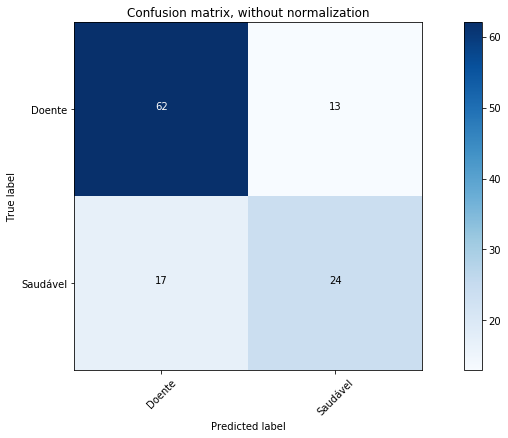

In [23]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=nomes,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

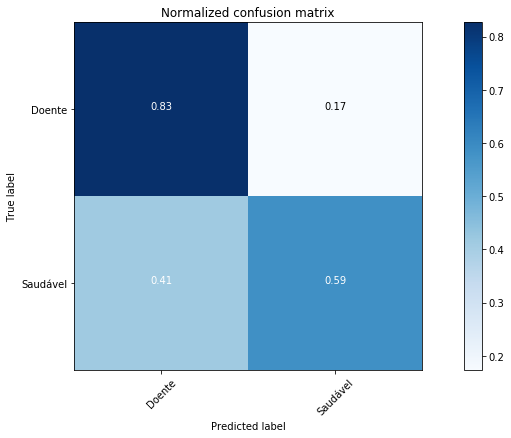

In [24]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=nomes, normalize=True,
                      title='Normalized confusion matrix')


## Comparativo real e esperado

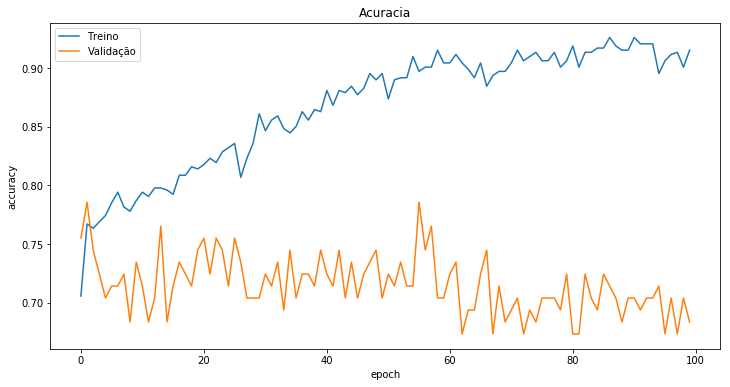

In [26]:
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Acuracia')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()